In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import folium
from folium.plugins import MarkerCluster

# Loading The data

In [2]:
df = pd.read_excel('D:\ev_final.xlsx')
df

,uid,name,vendor_name,address,latitude,longitude,city,country,open,close,...,postal_code,zone,0,available,capacity,cost_per_unit,power_type,total,type,vehicle_type
0,STATIC12,GensolCharge Pvt. Ltd.,GensolCharge Pvt. Ltd.,"NDSE Grid, BRPL South Extension",28.568238,77.219666,Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,15 kW,NaN,DC,2.0,BEVC DC 001,['4W']
1,STATIC14,REIL,REIL,Scada office kalka ji,28.541995,77.260583,Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,3.3 kW,NaN,AC,3.0,BEVC AC 001,"['2W', '3W', '4W']"
2,STATIC15,REIL,REIL,Ashram Chowk Mathura Road,28.571189,77.259806,Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,15 kW,NaN,DC,2.0,BEVC DC 001,['4W']
3,STATIC16,REIL,REIL,Nizamuddin Railway station,28.588991,77.253240,Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,15 kW,NaN,DC,4.0,BEVC DC 001,['4W']
4,STATIC17,BluSmart,BluSmart,"BSES Bhawan, Nehru Place, New Delhi 110048",28.549427,77.254636,Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,15 kW,NaN,DC,1.0,BEVC DC 001,['4W']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2700,1028,EESL Nehru Park Met,EESL,"Near Solar plant bus stop, Sastri Nagar, Che...",13.078481,80.249480,Chennai,India,00:00,23:59,...,600031,NaN,NaN,0.0,15.00 kW,₹12.93 per unit,DC,1.0,DC-001,['4W']
2701,1028,EESL Nehru Park Met,EESL,"Near Solar plant bus stop, Sastri Nagar, Che...",13.078481,80.249480,Chennai,India,00:00,23:59,...,600031,NaN,NaN,0.0,142.00 kW,₹20.14 per unit,DC,2.0,CCS (DC),['4W']
2702,1028,EESL Nehru Park Met,EESL,"Near Solar plant bus stop, Sastri Nagar, Che...",13.078481,80.249480,Chennai,India,00:00,23:59,...,600031,NaN,NaN,0.0,142.00 kW,₹20.14 per unit,DC,2.0,CHAdeMO (DC),['4W']
2703,BSES-1,BSES-DEL,Verdemobility,Opposite Crime Police Office Sector-9 Rama Kri...,28.572632,77.169680,New Delhi,India,00:00:00,23:59:59,...,110022,south-west-delhi,NaN,2.0,7.4 kW,₹16 per unit,AC,2.0,TYPE - 2 (AC),['4W']


# EDA Performs

In [3]:
print(f'List of columns - {df.columns}')

print(f'Shape of the dataframe - {df.shape}')

List of columns - Index([            'uid',            'name',     'vendor_name',
               'address',        'latitude',       'longitude',
                  'city',         'country',            'open',
                 'close',        'logo_url',           'staff',
         'payment_modes', 'contact_numbers',    'station_type',
           'postal_code',            'zone',                 0,
             'available',        'capacity',   'cost_per_unit',
            'power_type',           'total',            'type',
          'vehicle_type'],
      dtype='object')
Shape of the dataframe - (2705, 25)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2705 entries, 0 to 2704
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   uid              2705 non-null   object 
 1   name             2705 non-null   object 
 2   vendor_name      2705 non-null   object 
 3   address          2705 non-null   object 
 4   latitude         2705 non-null   float64
 5   longitude        2705 non-null   float64
 6   city             2705 non-null   object 
 7   country          2705 non-null   object 
 8   open             2705 non-null   object 
 9   close            2705 non-null   object 
 10  logo_url         2238 non-null   object 
 11  staff            2705 non-null   object 
 12  payment_modes    2705 non-null   object 
 13  contact_numbers  2705 non-null   object 
 14  station_type     2705 non-null   object 
 15  postal_code      2705 non-null   int64  
 16  zone             2410 non-null   object 
 17  0             

In [5]:
# As there are many columns, lets tranpose and view sample data.

In [6]:
df.head().T 

,0,1,2,3,4
uid,STATIC12,STATIC14,STATIC15,STATIC16,STATIC17
name,GensolCharge Pvt. Ltd.,REIL,REIL,REIL,BluSmart
vendor_name,GensolCharge Pvt. Ltd.,REIL,REIL,REIL,BluSmart
address,"NDSE Grid, BRPL South Extension",Scada office kalka ji,Ashram Chowk Mathura Road,Nizamuddin Railway station,"BSES Bhawan, Nehru Place, New Delhi 110048"
latitude,28.568238,28.541995,28.571189,28.588991,28.549427
longitude,77.219666,77.260583,77.259806,77.25324,77.254636
city,Delhi,Delhi,Delhi,Delhi,Delhi
country,India,India,India,India,India
open,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
close,23:59:59,23:59:59,23:59:59,23:59:59,23:59:59


We did observe some missing values. Let's invistigate and visualize the percentage of missing vlaue 

In [7]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Create a DataFrame with missing percentage information
missing_info = pd.DataFrame({'column': df.columns, 'missing_percentage': missing_percentage})

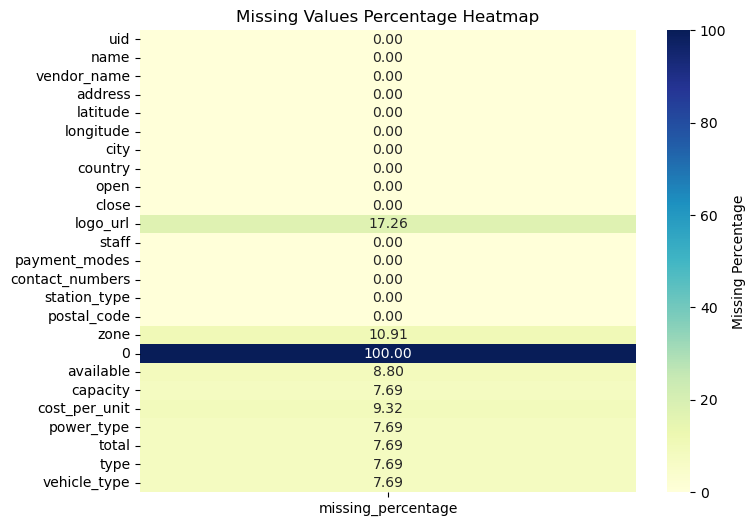

In [8]:
# Create a heatmap grid highlighting missing values percentage
plt.figure(figsize=(8, 6))
sns.heatmap(missing_info[['missing_percentage']], cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Missing Percentage'})
plt.title('Missing Values Percentage Heatmap')
plt.show()

# Data Processing Step

The data has some redundency,so lets clean some of the data  

In [9]:
df['capacity'].fillna('0 kW', inplace=True)

# Replace 'Delhi' with 'New Delhi' in the 'city' column
df['city'] = df['city'].replace('Delhi', 'New Delhi')

# Make data consistent
df['staff'] = df['staff'].replace('Staffed', 'staffed')
df['staff'] = df['staff'].replace('UnStaffed', 'unstaffed')
df['staff'] = df['staff'].replace('Unstaffed', 'unstaffed')

In [10]:
df.head()

,uid,name,vendor_name,address,latitude,longitude,city,country,open,close,...,postal_code,zone,0,available,capacity,cost_per_unit,power_type,total,type,vehicle_type
0,STATIC12,GensolCharge Pvt. Ltd.,GensolCharge Pvt. Ltd.,"NDSE Grid, BRPL South Extension",28.568238,77.219666,New Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,15 kW,NaN,DC,2.0,BEVC DC 001,['4W']
1,STATIC14,REIL,REIL,Scada office kalka ji,28.541995,77.260583,New Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,3.3 kW,NaN,AC,3.0,BEVC AC 001,"['2W', '3W', '4W']"
2,STATIC15,REIL,REIL,Ashram Chowk Mathura Road,28.571189,77.259806,New Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,15 kW,NaN,DC,2.0,BEVC DC 001,['4W']
3,STATIC16,REIL,REIL,Nizamuddin Railway station,28.588991,77.253240,New Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,15 kW,NaN,DC,4.0,BEVC DC 001,['4W']
4,STATIC17,BluSmart,BluSmart,"BSES Bhawan, Nehru Place, New Delhi 110048",28.549427,77.254636,New Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,15 kW,NaN,DC,1.0,BEVC DC 001,['4W']


We will drill down the analysis of further to city & vendor level.

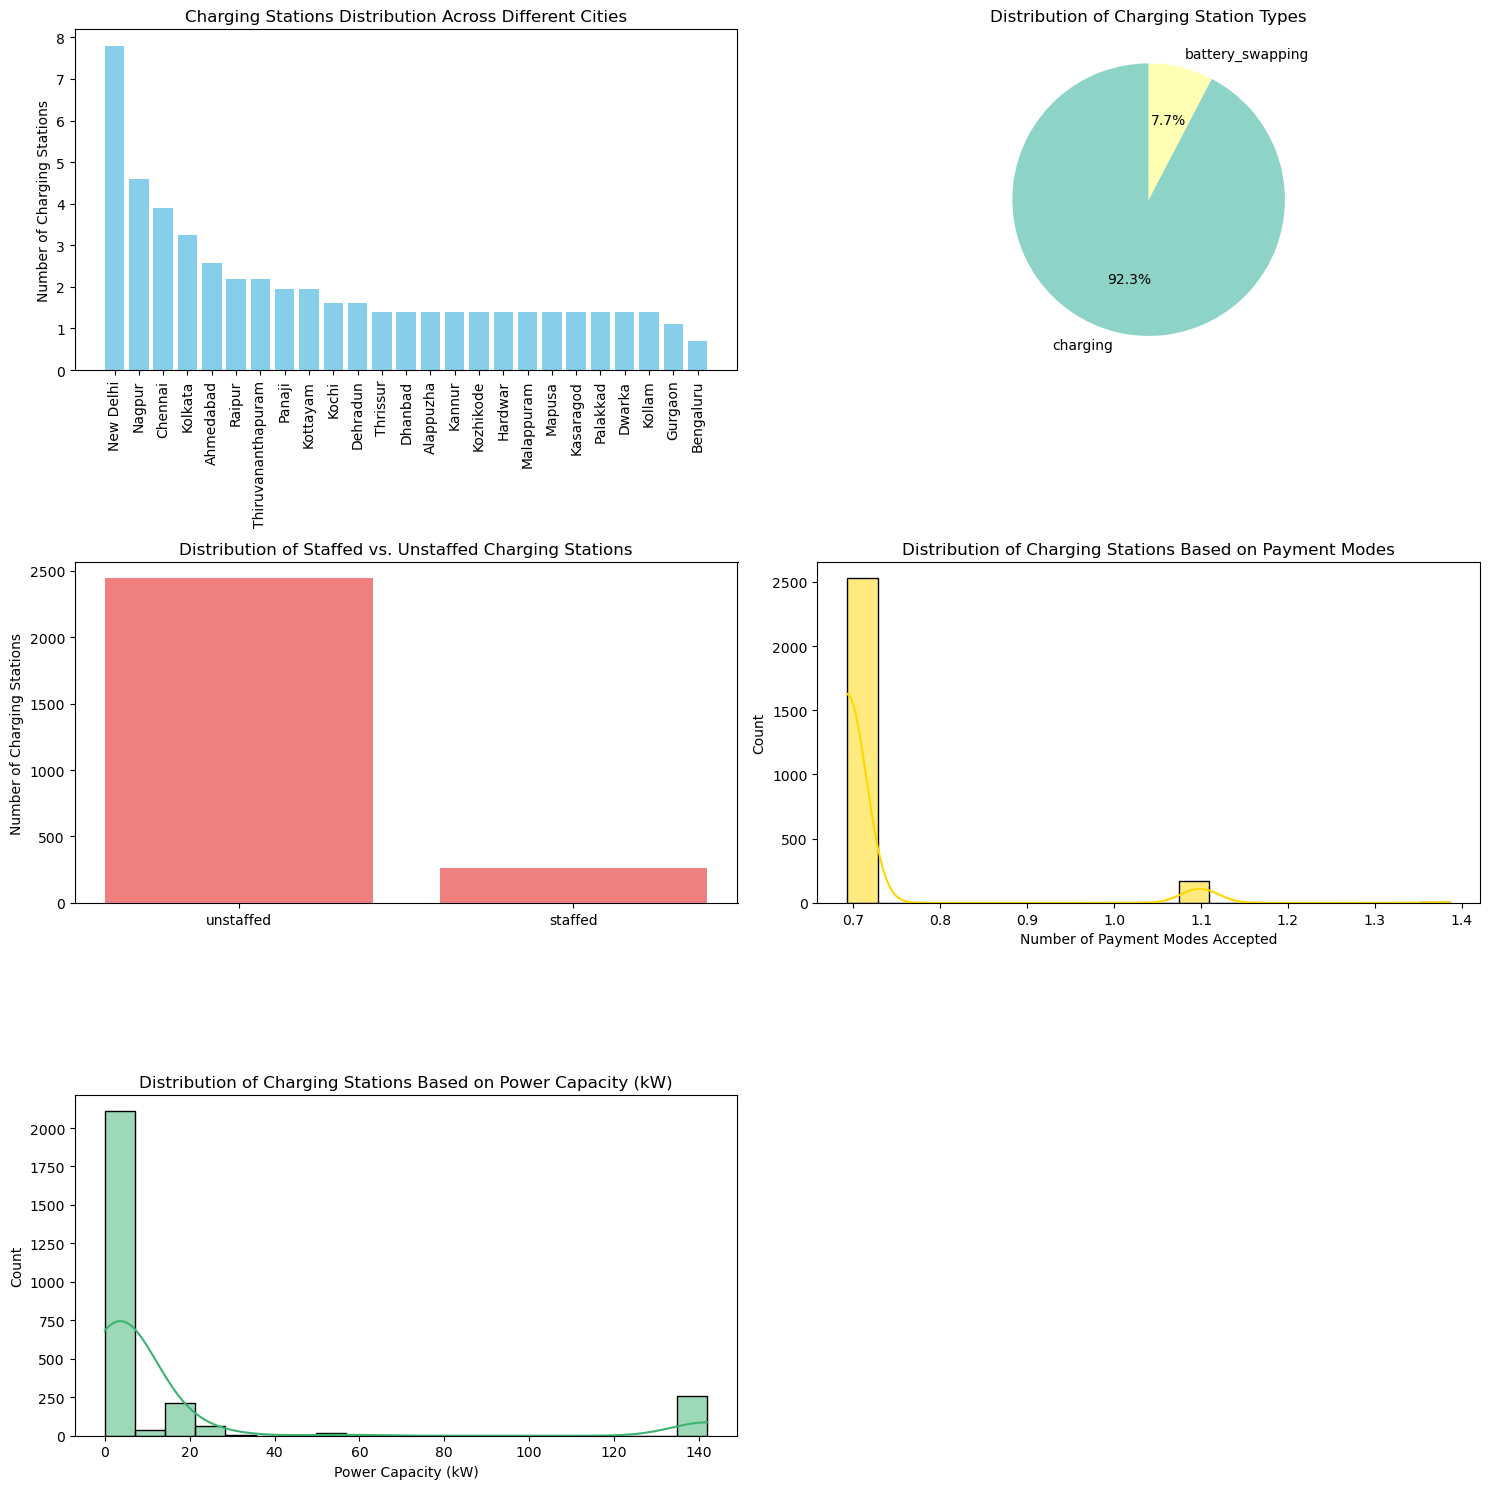

In [11]:
# Set up subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# 1. Check the distribution of charging stations across different cities in India.
city_distribution = df['city'].value_counts()
city_distribution = np.log1p(city_distribution)
axes[0, 0].bar(city_distribution.index, city_distribution.values, color='skyblue')
axes[0, 0].set_title('Charging Stations Distribution Across Different Cities')
axes[0, 0].set_ylabel('Number of Charging Stations')
axes[0, 0].tick_params(axis='x', rotation=90)

# 2. Explore the distribution of charging station types.
station_type_distribution = df['station_type'].value_counts()
axes[0, 1].pie(station_type_distribution, labels=station_type_distribution.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
axes[0, 1].set_title('Distribution of Charging Station Types')

# 3. Explore the distribution of stations that are staffed vs. unstaffed.
staff_distribution = df['staff'].value_counts()
axes[1, 0].bar(staff_distribution.index, staff_distribution.values, color='lightcoral')
axes[1, 0].set_title('Distribution of Staffed vs. Unstaffed Charging Stations')
axes[1, 0].set_ylabel('Number of Charging Stations')

# 4. Analyze the distribution of charging stations based on payment modes accepted.
payment_modes_distribution = df['payment_modes'].apply(lambda x: len(str(x).split(', ')) if pd.notnull(x) else 0)
payment_modes_distribution = np.log1p(payment_modes_distribution)
sns.histplot(payment_modes_distribution, bins=20, kde=True, color='gold', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Charging Stations Based on Payment Modes')
axes[1, 1].set_xlabel('Number of Payment Modes Accepted')


# 5. Explore the distribution of charging stations based on the capacity of power.
df['capacity'] = df['capacity'].replace({'kW': ''}, regex=True)
df['capacity'] = pd.to_numeric(df['capacity'], errors='coerce')
sns.histplot(df['capacity'], bins=20, kde=True, color='mediumseagreen', ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Charging Stations Based on Power Capacity (kW)')
axes[2, 0].set_xlabel('Power Capacity (kW)')

# Remove empty subplot
fig.delaxes(axes[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()

# Station Type Vs Power Type

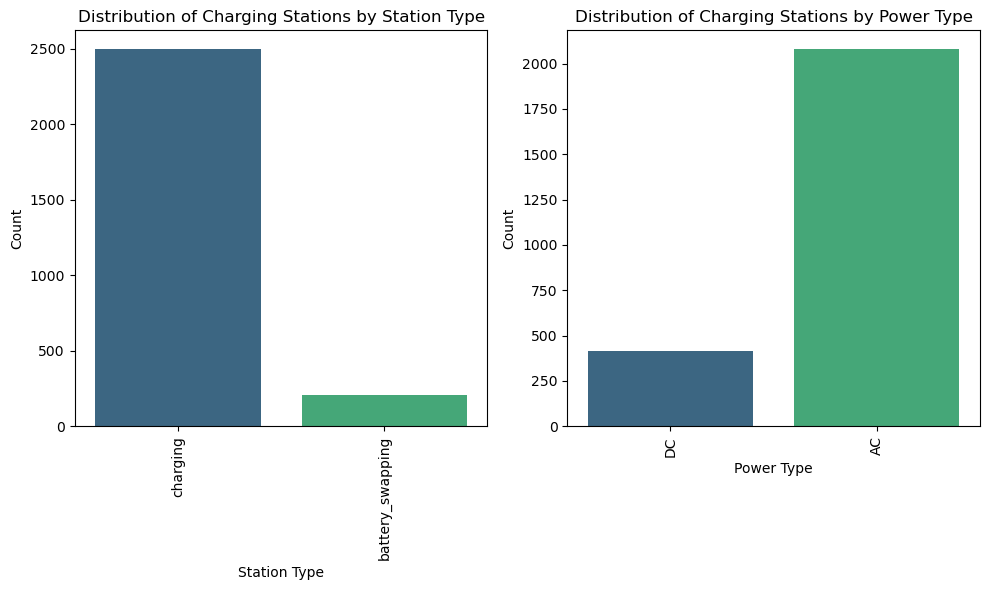

In [12]:
# Create subplots for station type and power type
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Investigate the distribution of cost per unit across different station types
sns.countplot(x='station_type', data=df, palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Charging Stations by Station Type')
axes[0].set_xlabel('Station Type')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# Investigate the distribution of cost per unit across different power types
sns.countplot(x='power_type', data=df, palette='viridis', ax=axes[1])
axes[1].set_title('Distribution of Charging Stations by Power Type')
axes[1].set_xlabel('Power Type')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

# Capacity Analysis

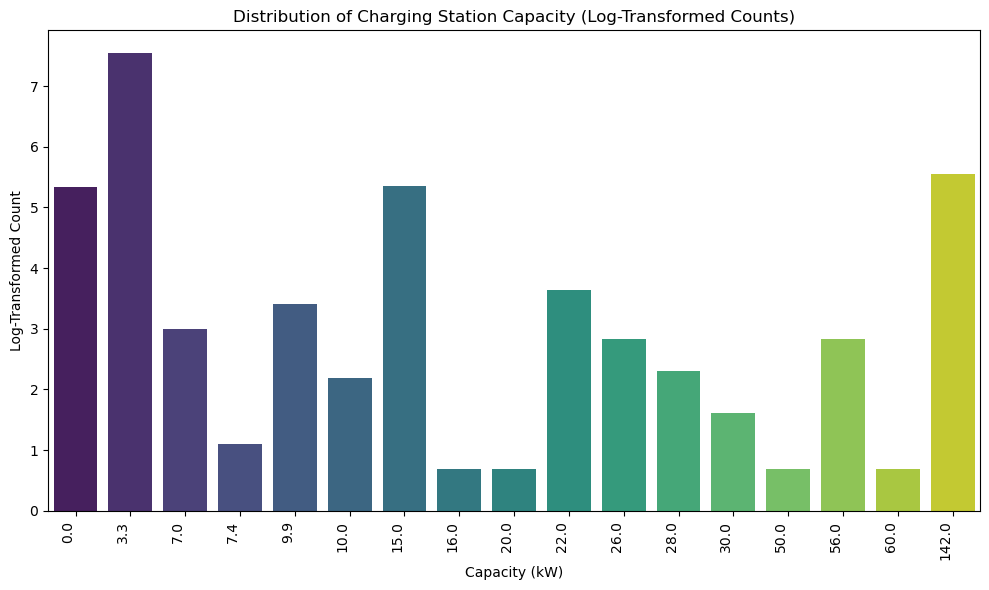

In [13]:
capacity_counts = df['capacity'].value_counts()

#Apply logarithm transformation to count values
log_counts = np.log1p(capacity_counts)

# Plot the distribution of charging station capacity with log-transformed counts
plt.figure(figsize=(10, 6))
sns.barplot(x=log_counts.index, y=log_counts.values, palette='viridis')

plt.title('Distribution of Charging Station Capacity (Log-Transformed Counts)')

plt.xlabel('Capacity (kW)')
plt.ylabel('Log-Transformed Count')
plt.xticks(rotation=90, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()

# Charging Station Vs Vehical Types

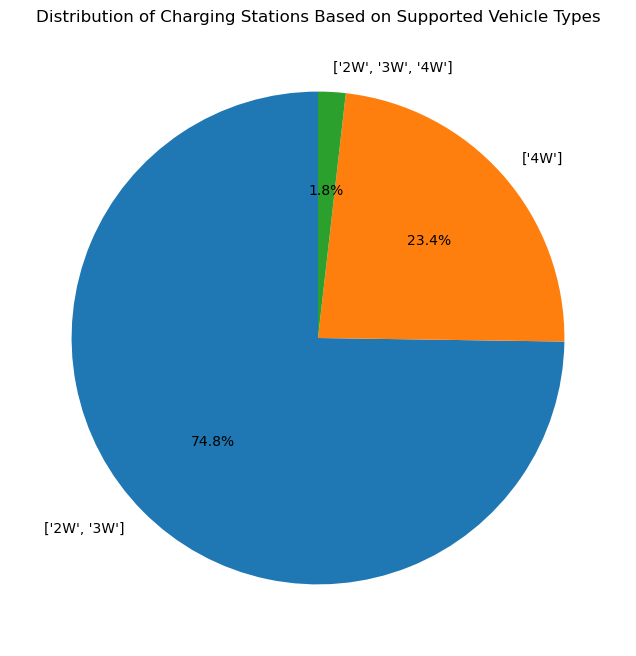

In [14]:
# Create a pie chart for the distribution of charging stations based on supported vehicle types
vehicle_type_counts = df['vehicle_type'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(vehicle_type_counts, labels=vehicle_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Charging Stations Based on Supported Vehicle Types')

# Show the plot
plt.show()

# Payment Mode Analysis

Text(95.72222222222221, 0.5, 'Station Type')

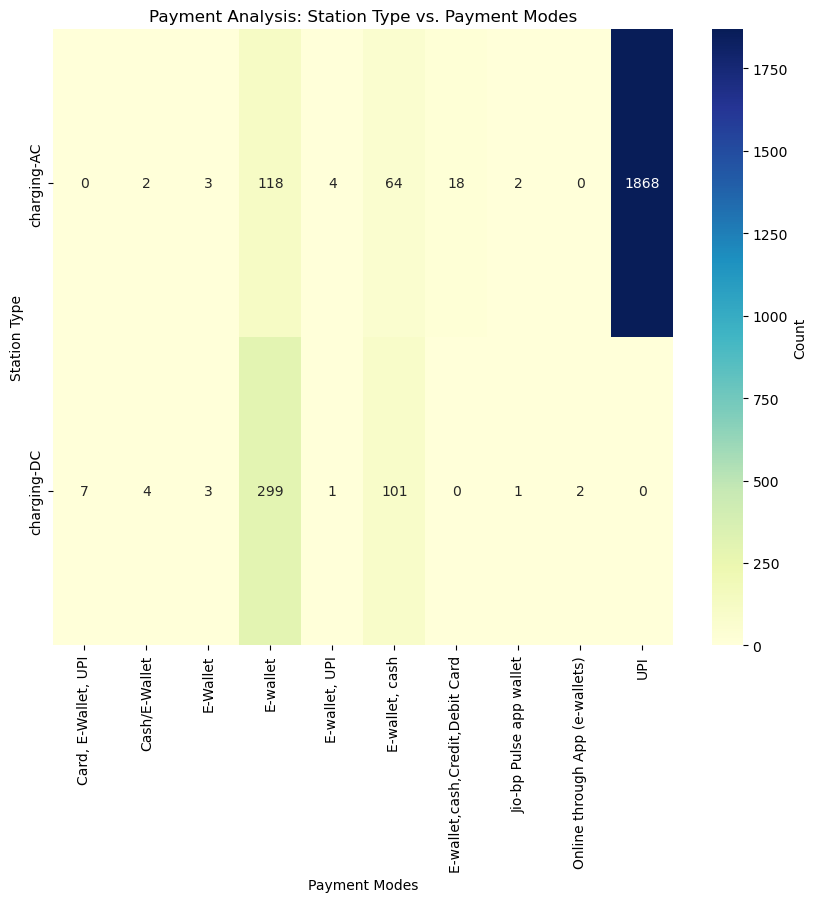

In [15]:
# Create a pivot table for payment analysis
payment_pivot = df.pivot_table(index=['station_type', 'power_type'], columns='payment_modes', values='vehicle_type', aggfunc='count', fill_value=0)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(payment_pivot, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Count'})
plt.title('Payment Analysis: Station Type vs. Payment Modes')
plt.xlabel('Payment Modes')
plt.ylabel('Station Type')

# Vender Analysis

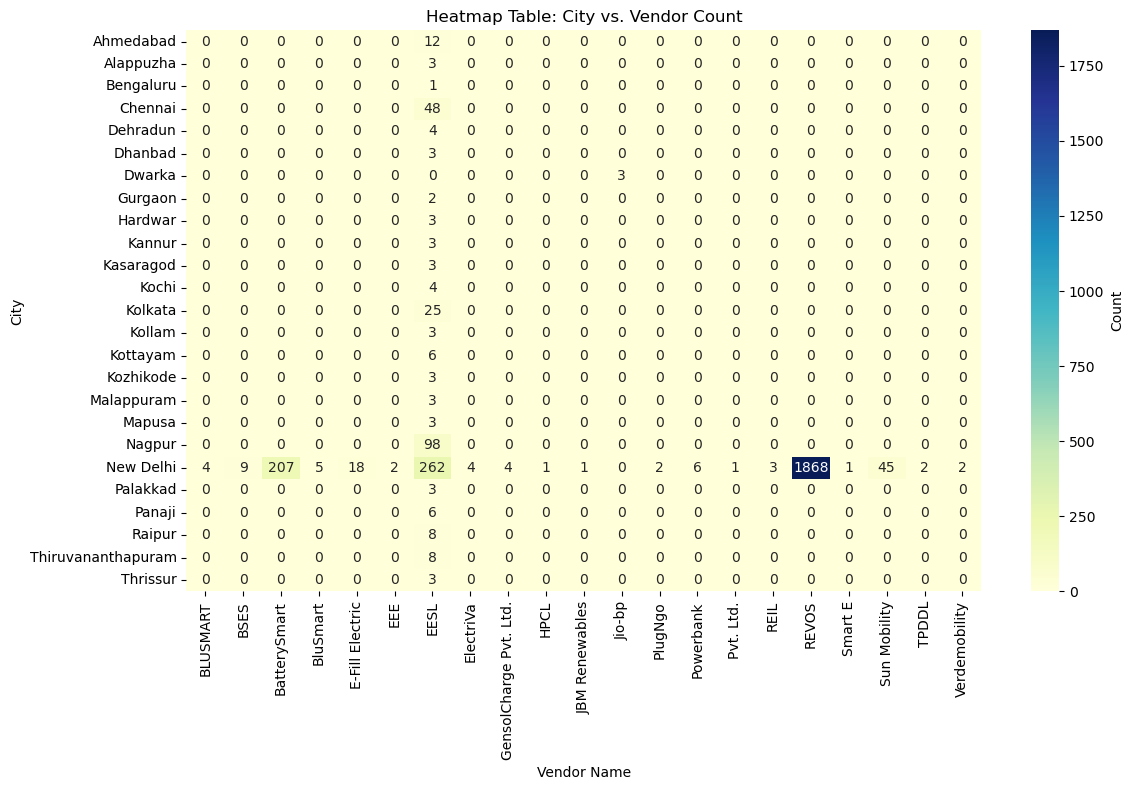

In [16]:
# Create a pivot table for city and vendor count
city_vendor_pivot = df.pivot_table(index='city', columns='vendor_name', values='uid', aggfunc='count', fill_value=0)

# Create a heatmap table
plt.figure(figsize=(12, 8))
sns.heatmap(city_vendor_pivot, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Count'}, fmt='g')
plt.title('Heatmap Table: City vs. Vendor Count')
plt.xlabel('Vendor Name')
plt.ylabel('City')

# Adjust layout
plt.tight_layout()
plt.show()

# Zone Wise Analysis 

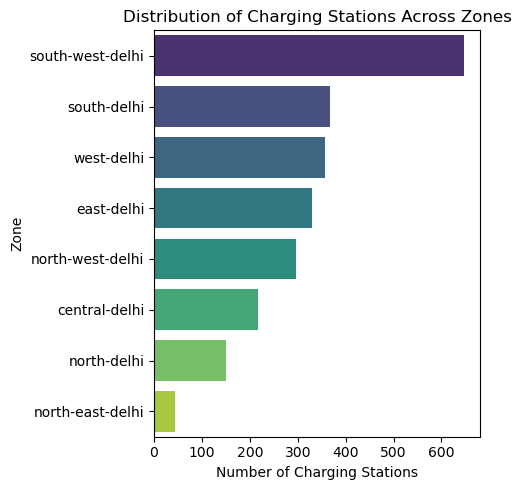

In [17]:
# Calculate the counts for each zone
zone_counts = df['zone'].value_counts()

# Sort the zones based on the counts
sorted_zones = zone_counts.sort_values(ascending=False).index

# Create a horizontal bar plot for the distribution of charging stations across different zones
plt.figure(figsize=(5, 5))
sns.countplot(y='zone', data=df, order=sorted_zones, palette='viridis')
plt.title('Distribution of Charging Stations Across Zones')
plt.ylabel('Zone')
plt.xlabel('Number of Charging Stations')

# Adjust layout
plt.tight_layout()
plt.show()

# Staff Analysis

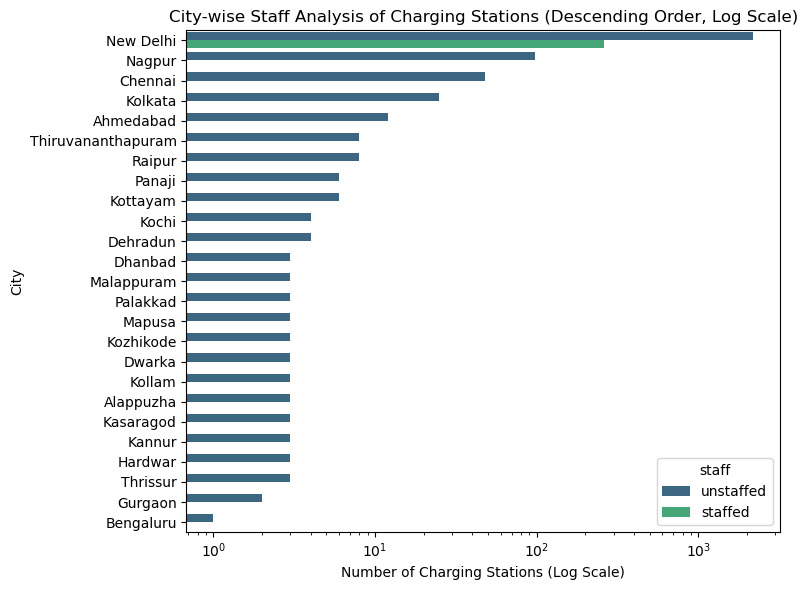

In [18]:
# Calculate the total number of charging stations in each city
city_station_counts = df.groupby('city')['uid'].count().reset_index()

# Sort the cities in descending order based on the total number of charging stations
sorted_cities = city_station_counts.sort_values(by='uid', ascending=False)['city']

# Create a horizontal count plot for the distribution of staffed and unstaffed charging stations across different cities
plt.figure(figsize=(8, 6))
sns.countplot(y='city', hue='staff', data=df, order=sorted_cities, palette='viridis')

# Apply a logarithmic scale to the x-axis
plt.xscale('log')

plt.title('City-wise Staff Analysis of Charging Stations (Descending Order, Log Scale)')
plt.ylabel('City')
plt.xlabel('Number of Charging Stations (Log Scale)')

# Adjust layout
plt.tight_layout()
plt.show()

In [19]:

# Create a map centered around the mean latitude and longitude
map_center = [df['latitude'].mean(), df['longitude'].mean()]
charging_map = folium.Map(location=map_center, zoom_start=5)

# Create a MarkerCluster to group nearby markers
marker_cluster = MarkerCluster().add_to(charging_map)

# Add markers for each charging station
for index, row in df.iterrows():
    popup_text = f"<b>{row['name']}</b><br>Vendor: {row['vendor_name']}<br>Contact: {', '.join(map(str, row['contact_numbers']))}"
    folium.Marker([row['latitude'], row['longitude']], popup=popup_text).add_to(marker_cluster)

charging_map

# Conclusion 

Thus, charging is more popular than battery swapping, and though battery swapping is discussed for its ease, it may take time to establish the needed infrastructure. Few charging station with only '4W' facility are very less in number compared to 2W and 3W. Payment options, particularly UPI, dominate in India, with a lack of cash-only stations, and surprisingly low card payments. While the dataset focuses on New Delhi, exploration of other cities reveals EV initiatives in places like Chennai and Kolkata. Staffing trends vary across cities, requiring further visualization to validate assumptions. Lastly, using latitude and longitude data to map EV stations.

# GitHub Link 

(https://github.com/akshaylanjewar0872/EV-Market-Analysis/).